<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)





# IntML2020- Análisis de Componentes y Discriminantes

# Ejercicio 1

(a) Estudie el grupo de datos sobre cancer de mama, diga cuantas clases hay, cuantos datos y cuantas variables.

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

(b) Estudie la siguiente afirmación: "PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class separability." Para ello proyecte las clases en las dos primeras componentes principales y en ''el'' discriminante. 



(c) Diga si las clases son linealmente separables en estos espacios. 

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [4]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
len(data.feature_names)

30

In [7]:
len(data.target)

569

### Sobre el grupo de datos:
- Hay 2 clases: maligno y benigno
- Hay 30 variables que parecen ser continuas
- Hay 569 datos

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

In [8]:
X = data.data
y = data.target

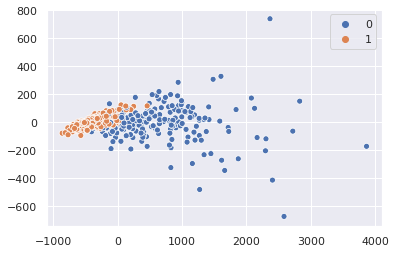

In [9]:
pca = PCA(n_components = 2)
pca.fit(X)
PCA_data = pca.transform(X)
sns.scatterplot(x=PCA_data[:,0],y=PCA_data[:,1],hue=y)

No parece ser linealmente separable pero podemos intentar aplicar una normalizacion antes de hacer el analisis de componentes principales

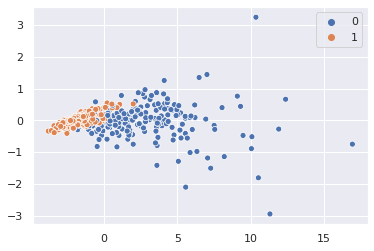

In [10]:
x_mean = X.mean()
x_std = X.std()
x_norm = (X - x_mean)/x_std
pca = PCA(n_components = 2)
pca.fit(x_norm)
PCA_data = pca.transform(x_norm)
sns.scatterplot(x=PCA_data[:,0],y=PCA_data[:,1],hue=y)

Bueno es lo mismo jeje

In [11]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X,y)
discriminant = lda.transform(X)


 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

# Ejercicio 2

Estudie el grupo de datos T8_3_FOOTBALL.dat. Se presentan 3 grupos de 30 sujetos cada uno, el primero de jugadores de futbol americano de secundaria (grupo1), el segundo de jugadores de universidad (grupo 2) y el tercero de control  (grupo 3). Las variables medidas son WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW, y son mediciones de la cabeza de los sujetos. 

In [12]:
import pandas as pd
# Le saque algunos espacios extra que tenía a mano, porque son pocos datos
columns = ['GROUP','WDIM','CIRCUM','FBEYE','EYEHD','HEARHD','JAW']
df = pd.read_csv('../data/T8_3_FOOTBALL.DAT', header=None,sep=' ',names=columns)
df.head()

,GROUP,WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW
0,1,13.5,57.15,19.5,12.5,14.0,11.0
1,1,15.5,58.42,21.0,12.0,16.0,12.0
2,1,14.5,55.88,19.0,10.0,13.0,12.0
3,1,15.5,58.42,20.0,13.5,15.0,12.0
4,1,14.5,58.42,20.0,13.0,15.5,12.0


* (a) Realice un análisis discriminante sobre un 80% del conjunto datos, clasificando el 20% restante. 
* (b) Compare con los errores obtenidos clasificando con un Naive Gauss sobre el mismo conjunto de datos.
* (c) Escriba la matriz de confusion de ambos métodos. 


Para computar el error aparente puede usar la funcion 

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
qda = QuadraticDiscriminantAnalysis()
(iris_data, iris_target) = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
clf = qda.fit(X_train, y_train)
clf.score(X_test, y_test) 



1.0

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [14]:
features_columns = ['WDIM','CIRCUM','FBEYE','EYEHD','HEARHD','JAW']
X = df[features_columns]
y = df['GROUP']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
y_train.value_counts()

3    24
2    24
1    24
Name: GROUP, dtype: int64

In [17]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
clf = lda.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6111111111111112

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
ng = GaussianNB()
ng_clf = ng.fit(X_train,y_train)
ng_clf.score(X_test,y_test)

0.5

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred,normalize='all')
cm

array([[0.22222222, 0.        , 0.11111111],
       [0.        , 0.22222222, 0.11111111],
       [0.        , 0.16666667, 0.16666667]])

In [21]:
y_pred = ng_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred,normalize='all')
cm

array([[0.22222222, 0.05555556, 0.05555556],
       [0.        , 0.16666667, 0.16666667],
       [0.        , 0.22222222, 0.11111111]])

# Ejercicio 3:
Limpieza de ruido y selección de dimensión. 

 * (a) Trabaje con el dataset digits, estudie cuantos datos tiene, cuantas variables  y cuantas clases.

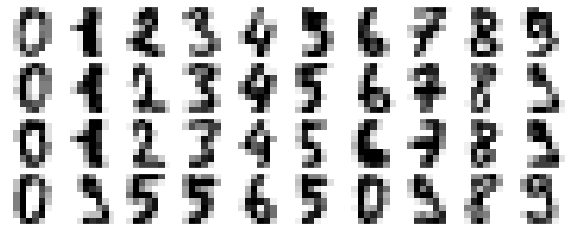

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

* (b) Realice un análisis de componentes principales y extraiga las dos primarias. Plotee. Puede ayudarse con el siguiente código o plotear en el paquete de su agrado.

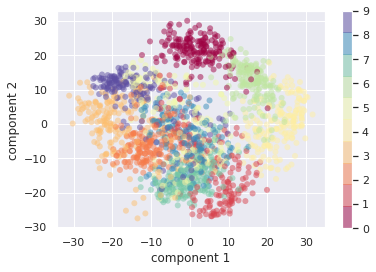

In [23]:

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


* (c) Explique  usando el radio de varianza explicada porque este colorido dibujo no permite distinguir clases. Cuantas dimensiones son necesarias para obtener un 50% de varianza explicada?  Y un 80%? Puede ayudarse con este plot.

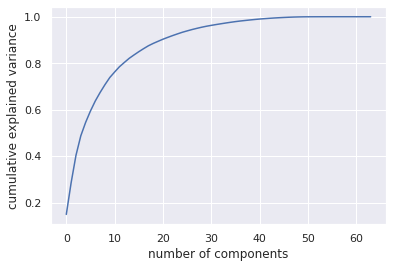

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

* (d) Si agregamos ruido a los digitos, como en el siguiente código,  plotee el resultado y diga que tipo de ruido agregó, estudiante la documentación.

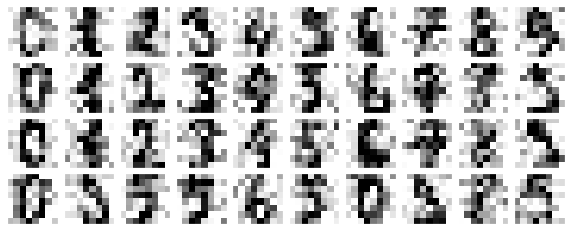

In [69]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [70]:
noisy.shape

(1797, 64)

*  (e) Realice un análisis de componentes principales que preserve el 50% de la varianza. Diga cuantas componentes le quedan. 

* (f) Realice una clasificación con Naive Bayes sobre las primeras dos componentes, sobre las primeras 12 de los datos originales y sobre las primeras doce de los datos ruidosos. Diga cual clasificacion es mejor usando errores aparentes.

* (g) Reconstruya los datos a partir de las 12 componentes principales ruidosas y plotee el resultado. 


# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [71]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
digits.data.shape

(1797, 64)

- Hay 1797 datos
- Hay 10 clases (10 digitos)
- Hay 64 variables

 <span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

Para obtener al menos un 50% de varianza explicada necesitaríamos 5 componentes al menos. 
En el dibujo no podemos distinguir clases pues 2 componentes no nos brindan la información suficiente como para distinguir, es decir, con esos 2 componentes no es posible explicar la diferencia entre los datos.

Con 13 componentes o más obtenemos un 80% de varianza explicada.

 <span style="color:red"> RESPONDA EL INCISO  (d) AQUÍ </span>

Lo que se está haciendo es generar ruido creando muestras de distribuciones gaussianas con media digits.data y desviación estandar 4.


 <span style="color:red"> RESPONDA EL INCISO  (e) AQUÍ </span>

Ya vimos que para preservar 50% de varianza necesitamos al menos 4 componentes.
Cuando le pasamos a PCA un numero entre 0 y 1, selecciona el minimo numero de componentes principales tal que la varianza explicada es superior a ese numero

In [73]:
pca = PCA(0.50).fit(digits.data)
pca.n_components_

5

 <span style="color:red"> RESPONDA EL INCISO  (f) AQUÍ </span>

In [78]:
# Naive Bayes gaussiano, 2 componentes principales
pca_2 = PCA(2).fit_transform(digits.data)
X_train,X_test,y_train,y_test = train_test_split(pca_2,digits.target,test_size=0.2,random_state=42)
ng = GaussianNB()
ng_clf = ng.fit(X_train,y_train)
ng_clf.score(X_test,y_test)

0.6638888888888889

In [79]:
# Naive Bayes gaussiano, 12 componentes principales
pca_12 = PCA(12).fit_transform(digits.data)
X_train,X_test,y_train,y_test = train_test_split(pca_12,digits.target,test_size=0.2,random_state=42)
ng = GaussianNB()
ng_clf = ng.fit(X_train,y_train)
ng_clf.score(X_test,y_test)

0.9111111111111111

In [80]:
# Naive Bayes gaussiano, 12 componentes principales, datos ruidosos
pca_12 = PCA(12).fit(noisy)
pca_12_noisy = pca_12.transform(noisy)
X_train,X_test,y_train,y_test = train_test_split(pca_12_noisy,digits.target,test_size=0.2,random_state=42)
ng = GaussianNB()
ng_clf = ng.fit(X_train,y_train)
ng_clf.score(X_test,y_test)

0.8694444444444445

Usando errores aparentes, la mejor clasificación es la que tiene 12 componentes principales.
Posiblemente si hubiesemos elegido ruido menos disperso, las clasificaciones serían bastante parecidas, y no me sorprendería que la ruidosa se comporte mejor en conjuntos de test

 <span style="color:red"> RESPONDA EL INCISO  (g) AQUÍ </span>

In [81]:
filtered = pca_12.inverse_transform(pca_12_noisy)

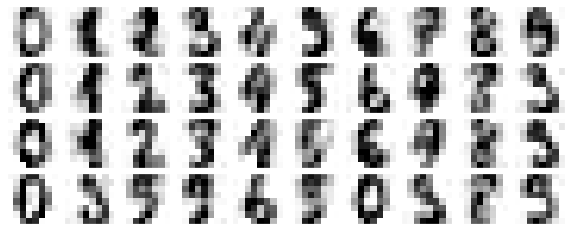

In [82]:
plot_digits(filtered)

# Ejercicio 4: 

* (a) Levante el grupo de datos Labeled Faces in the Wild dataset, y diga cuantas variables tiene, cuantos datos, cuantas clases y la dimension del espacio de discriminación.  


In [83]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [85]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [96]:
faces.data.shape

(1348, 2914)

* (b) Realice un estudio de componentes principales con 150 componentes, usando la keyword randomized para acelerar el algoritmo y visualize las componentes. Puede ayudarse con el sigueinte código. Explique que realiza la keyword elegida estudiando la documentacion. 


In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',whiten=False)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

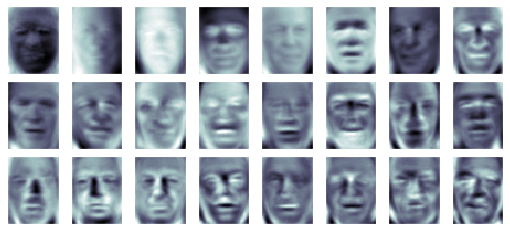

In [87]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Usa Singular Value Decomposition aleatorizado. Este método es más eficiente pues genera una aproximación de SVD pero randomizando, evitando así tener que hacer calculos matriciales computacionalmente muy costosos, pero obteniendo una aproximación probabilistica del verdadero valor.

* (c) Diga cual es la varianza explicada por las primeras 150 componentes. 

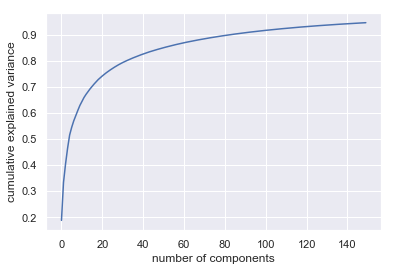

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [89]:
(np.cumsum(pca.explained_variance_ratio_))[149]

0.9456977

Esa es la varianza explicada por las primeras 150 componentes

* (d) Elija el número de componentes que explica el 80% de la varianza y reconstruya las caras con 150 y el número elegido por Ud de componentes. plotee en tres filas las originales y las dos reconstrucciones. Puede ayudarse con el siguiente código

In [92]:
# Compute the components and projected faces
pca_80 = PCA(0.8).fit(faces.data)
components_80 = pca_80.transform(faces.data)
projected_80 = pca_80.inverse_transform(components_80)
pca_80.n_components_

33

In [93]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

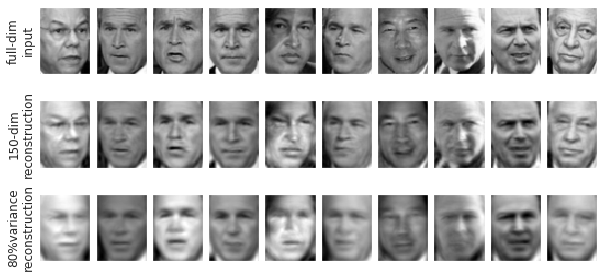

In [95]:
# Plot the results
fig, ax = plt.subplots(3, 10, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(projected_80[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');
ax[2, 0].set_ylabel('80%variance\nreconstruction');

* (e) Clasifique las caras con el método de su elección y compute el error aparente. 
* (f) Arme la matriz de confusion del método elegido usando confusion_matrix. 

In [97]:
# Vamos a usar los 150 componentes principales para la clasificación
X_train,X_test,y_train,y_test = train_test_split(components,faces.target,test_size=0.2)

In [98]:
ng = GaussianNB()
ng_clf = ng.fit(X_train,y_train)
ng_clf.score(X_test,y_test)

0.7111111111111111

In [99]:
y_pred = ng_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred,normalize='all')
cm

array([[0.02592593, 0.01481481, 0.0037037 , 0.02592593, 0.        ,
        0.        , 0.        , 0.        ],
       [0.00740741, 0.13333333, 0.0037037 , 0.03333333, 0.        ,
        0.        , 0.        , 0.0037037 ],
       [0.        , 0.        , 0.04444444, 0.02592593, 0.        ,
        0.        , 0.        , 0.        ],
       [0.00740741, 0.01111111, 0.00740741, 0.37407407, 0.00740741,
        0.0037037 , 0.        , 0.        ],
       [0.0037037 , 0.00740741, 0.        , 0.02592593, 0.02592593,
        0.0037037 , 0.        , 0.        ],
       [0.        , 0.00740741, 0.        , 0.02222222, 0.        ,
        0.02592593, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.02222222, 0.        ,
        0.0037037 , 0.02592593, 0.        ],
       [0.0037037 , 0.        , 0.0037037 , 0.01851852, 0.01111111,
        0.        , 0.        , 0.05555556]])